<a href="https://colab.research.google.com/github/dalmasanchez24/proyecto_integrado_2/blob/main/Educacion_Argentina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: armar un dataframe de al menos 100 filas con datos random con apellido y nombre, nro_dni, materias de educacion nivel secundario de la argentina que contenga las siguientes columnas: materia escolar, nota 1er Trimestre, nota 2do Trimestre, nota 3er Trimestre, Faltas a clases.

import pandas as pd
import numpy as np
import random

# Lista de materias escolares de nivel secundario en Argentina
materias = [
    "Matemática", "Lengua y Literatura", "Historia", "Geografía", "Ciencias Naturales",
    "Educación Física", "Inglés", "Física", "Química", "Biología", "Filosofía", "Sociología",
    "Arte", "Música", "Informática"
]

# Función para generar un nombre y apellido aleatorio
def generar_nombre_apellido():
  nombres = ["Juan", "María", "Pedro", "Laura", "Carlos", "Ana", "Luis", "Marta", "Diego", "Sofia"]
  apellidos = ["Gómez", "Pérez", "Rodríguez", "Fernández", "López", "García", "Martínez", "Sánchez", "Alonso", "Díaz"]
  return random.choice(nombres) + " " + random.choice(apellidos)

# Generar datos aleatorios para el DataFrame
data = []
for i in range(100):
  nombre_apellido = generar_nombre_apellido()
  dni = np.random.randint(10000000, 99999999)
  materia = random.choice(materias)
  nota_1er_trimestre = np.random.randint(1, 11)
  nota_2do_trimestre = np.random.randint(1, 11)
  nota_3er_trimestre = np.random.randint(1, 11)
  faltas = np.random.randint(0, 15)
  data.append([nombre_apellido, dni, materia, nota_1er_trimestre, nota_2do_trimestre, nota_3er_trimestre, faltas])

# Crear el DataFrame
df = pd.DataFrame(data, columns=["Apellido y Nombre", "Nro DNI", "Materia Escolar", "Nota 1er Trimestre", "Nota 2do Trimestre", "Nota 3er Trimestre", "Faltas a Clases"])

# Mostrar las primeras 10 filas del DataFrame
print(df.head(10))

  Apellido y Nombre   Nro DNI Materia Escolar  Nota 1er Trimestre  \
0   Sofia Rodríguez  33624092          Física                   5   
1      Marta Alonso  16789786          Física                   4   
2  Carlos Fernández  55683404            Arte                   4   
3   Diego Fernández  52360422        Historia                   7   
4        Juan Gómez  96579793       Filosofía                   6   
5     Ana Fernández  79691590       Filosofía                   2   
6       María Pérez  23594248      Sociología                   5   
7   Laura Rodríguez  74035726     Informática                   6   
8       Marta López  89934758          Física                   2   
9         Luis Díaz  93502749       Filosofía                   4   

   Nota 2do Trimestre  Nota 3er Trimestre  Faltas a Clases  
0                   4                   9                7  
1                   5                   2               14  
2                   7                   3                

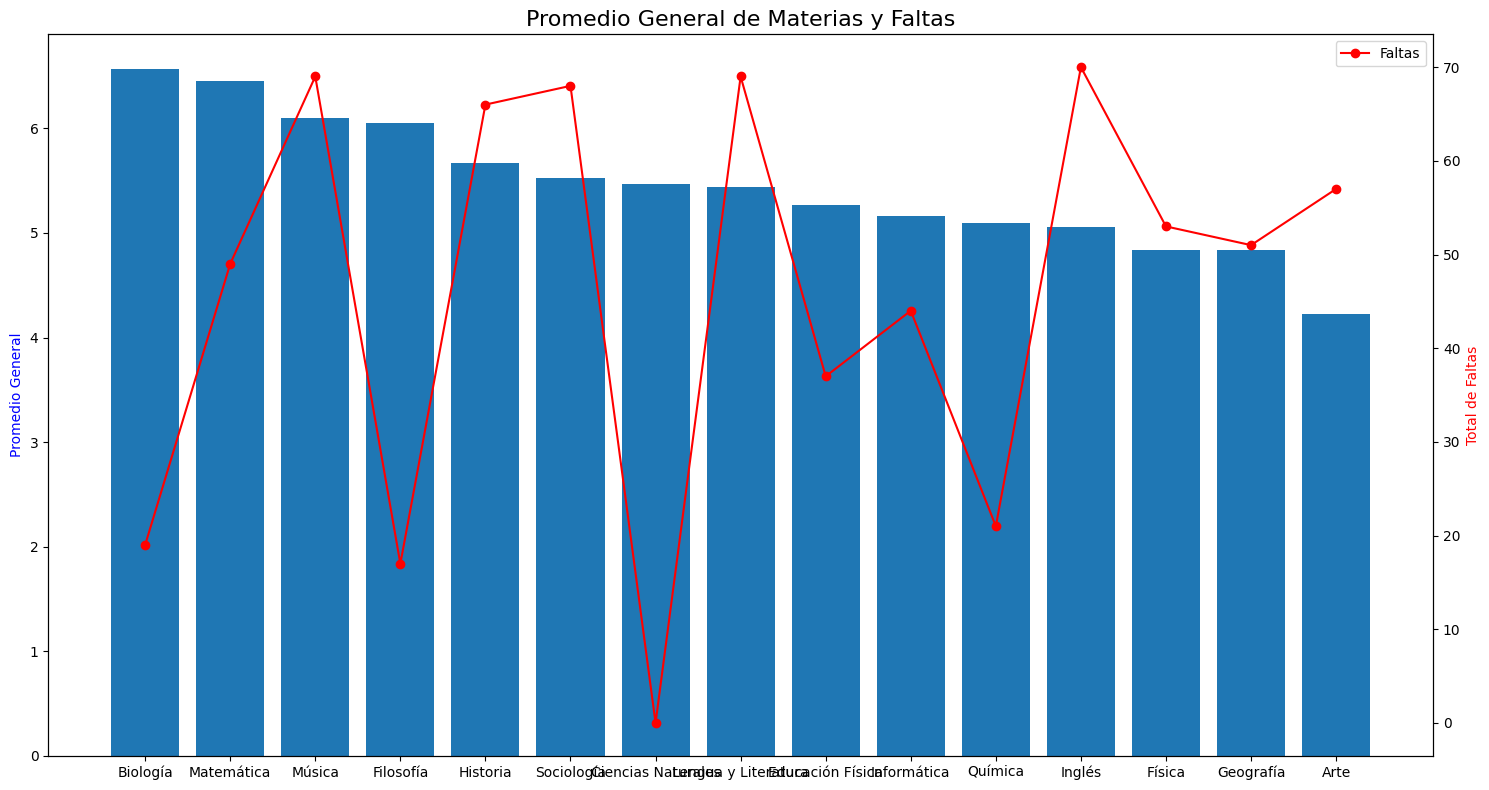

In [2]:
# prompt: Armar grafico de barras con Promedio general de cada materia, ordenados de mayor a menor, agregar las faltas como valor constrastable en dos ejes. Agregar las leyendas que ayuden a la interpretación.

import matplotlib.pyplot as plt
import pandas as pd

# Calcular el promedio general de cada materia
promedio_por_materia = df.groupby('Materia Escolar').agg({'Nota 1er Trimestre': 'mean', 'Nota 2do Trimestre': 'mean', 'Nota 3er Trimestre': 'mean'})
promedio_por_materia['Promedio General'] = promedio_por_materia.mean(axis=1)

# Ordenar las materias por promedio general de mayor a menor
promedio_por_materia = promedio_por_materia.sort_values('Promedio General', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(15, 8))
ax1 = plt.gca()  # Obtener el eje actual
ax1.bar(promedio_por_materia.index, promedio_por_materia['Promedio General'])

# Agregar las faltas como valor constrastable en un segundo eje
ax2 = ax1.twinx()
ax2.plot(promedio_por_materia.index, df.groupby('Materia Escolar')['Faltas a Clases'].sum(), color='red', marker='o')

# Rotar las etiquetas del eje x para que sean legibles
plt.xticks(rotation=45, ha='right')

# Agregar título y leyendas
plt.title('Promedio General de Materias y Faltas', fontsize=16)
ax1.set_ylabel('Promedio General', color='blue')
ax2.set_ylabel('Total de Faltas', color='red')
plt.legend(['Faltas'], loc='upper right')

# Mostrar el gráfico
plt.tight_layout()  # Ajustar el diseño para evitar superposiciones
plt.show()

In [3]:
df.to_csv("datos_alumnos.csv", index=False)